# Simulation of Hi-C data

In [1]:
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/clustering/class/')

In [2]:
import time
import numpy as np
import cooltools.lib.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

from time import time
from k_medoids import KMedoids
from cluster_statistics import ClusterStatistics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.ticker import LogLocator, LogFormatterSciNotation
from data_preparation import DataPreparation
from dissimilarity_matrix import DissimilarityMatrix
from simulate_data import SimulateData

In [3]:
# globally set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

## Initialization
Specify the **resolution**, **maximum range** of simulated matrix and the **method** for calculating the differential Hi-C contact matrix.

In [5]:
resolution = 32000
max_range = 3e6
method = 'subtract'

In [6]:
# simulate data
simulation = SimulateData(resolution, max_range, method)

In [7]:
print(f"#NaN's: {np.sum(np.isnan(simulation.noise))}")
print(f"#Matrix entries: {np.shape(simulation.noise)[0] * np.shape(simulation.noise)[1]}")
print(f"Region: {simulation.region}")
print(f"Minimum noise: {np.nanmin(simulation.noise)}")

#NaN's: 0
#Matrix entries: 9025
Region: chr17:47770639-50770639
Minimum noise: -0.01871617942545392


## Visualization of noise

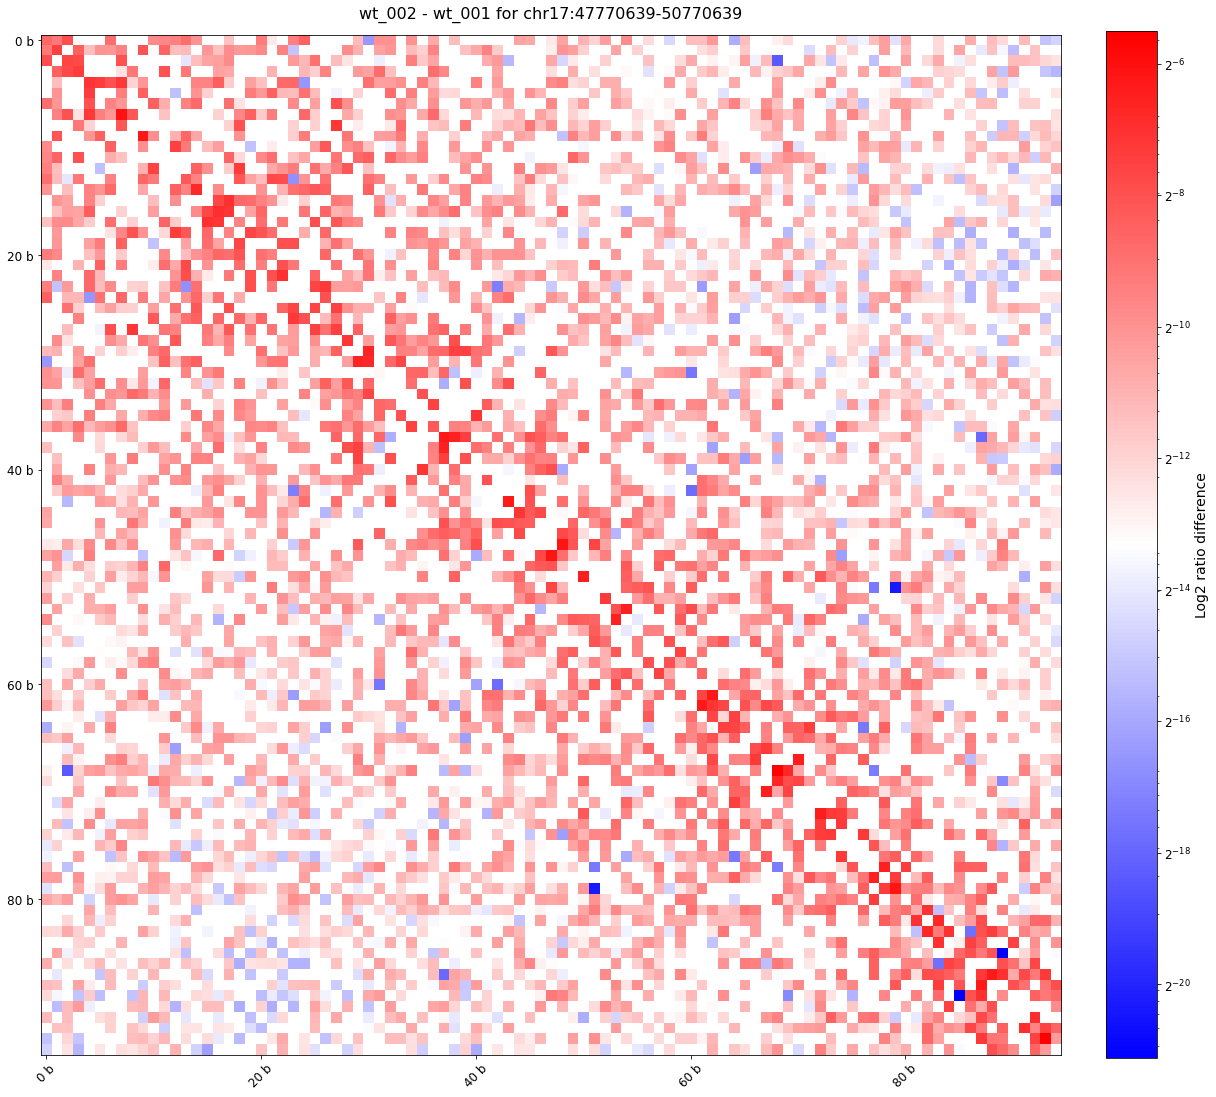

In [8]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=1,
                      sharex=True, sharey=False)
ax = axs
norm = mpl.colors.LogNorm()
im = ax.matshow(simulation.noise,
                cmap='bwr',
                norm=norm)
                #extent=(0,simulation.clr.chromsizes[region], simulation.clr.chromsizes[region], 0))
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('wt_002 - wt_001 for ' + simulation.region, y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
format_ticks(ax)

## Add TAD

In [9]:
simulation.add_tad()
final = simulation.compare()

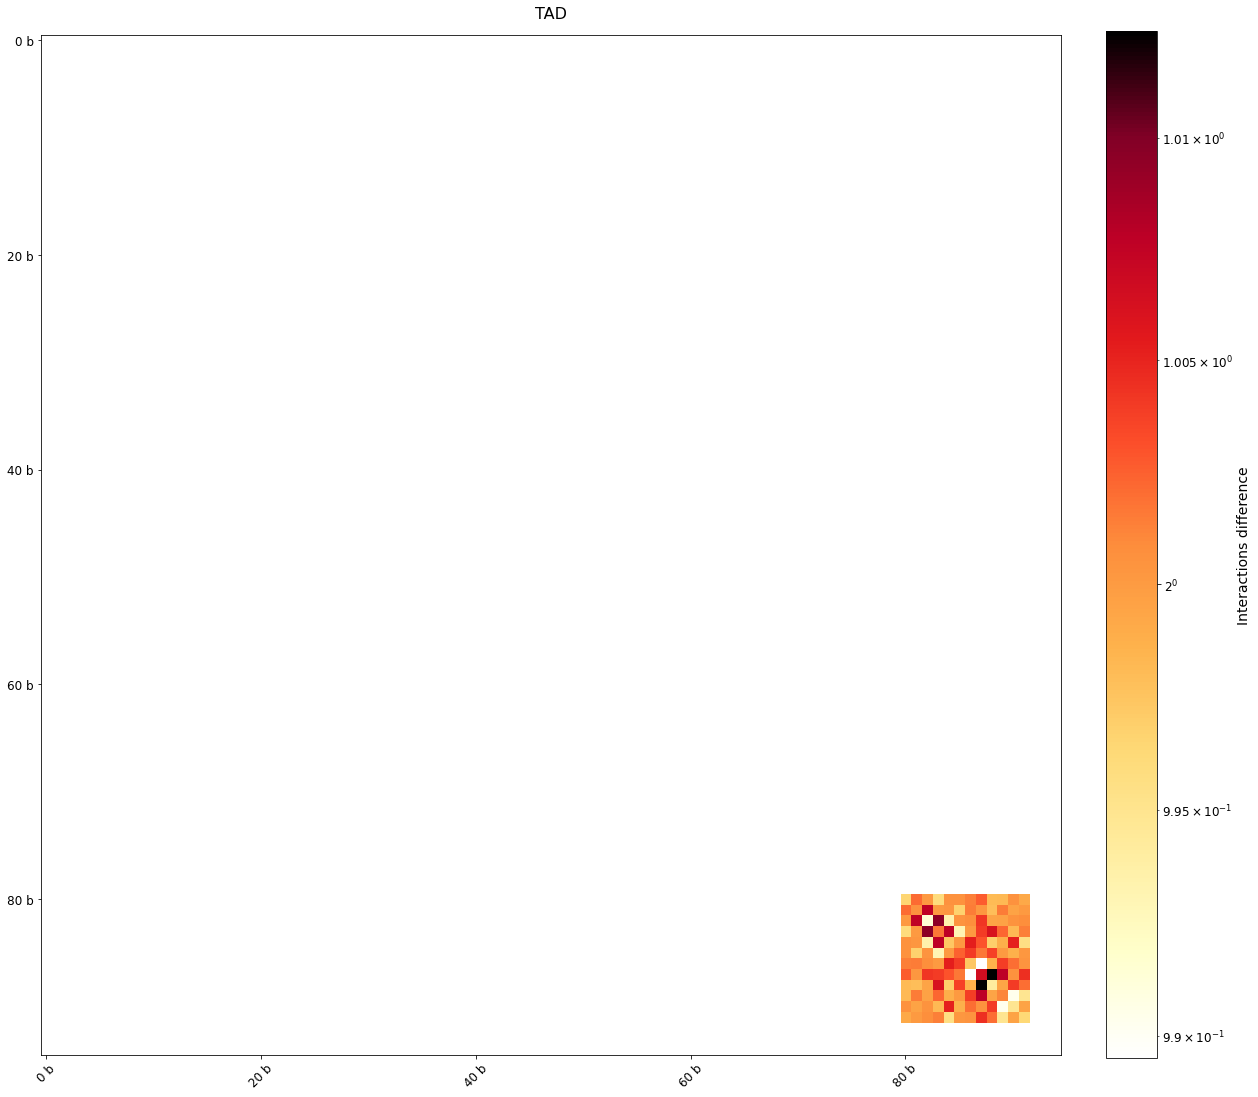

In [10]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=1,
                      sharex=True, sharey=False)
ax = axs
norm = mpl.colors.LogNorm()
im = ax.matshow(final,
                cmap='fall',
                norm=norm)
                #extent=(tad['Start'].values[0], tad['End'].values[0], tad['End'].values[0], tad['Start'].values[0]))
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interactions difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('TAD', y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
format_ticks(ax)